Гипотеза 4: Взаимосвязь между ИМТ, кровяным давлением и расстройствами сна

Существует ли взаимосвязь между категорией ИМТ, показателями кровяного давления и наличием определенных расстройств сна? Можно предположить, что люди с избыточным весом или ожирением чаще страдают от апноэ во сне, что в свою очередь коррелирует с повышенным кровяным давлением. Предполагается наличие положительной корреляции между этими показателями: повышенный ИМТ → повышенное кровяное давление → апноэ во сне.

In [1]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем стиль для графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Загружаем датасет
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print('='*80)
print('Первые строки датасета:')
print(df.head(3))
print(f'\nФорма датасета: {df.shape}')
print(f'Столбцы: {list(df.columns)}')
print('='*80)

# Разделяем столбец Blood Pressure на Systolic и Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

# Создаём бинарную переменную для апноэ (1 = Apnea, 0 = иное)
df['Has_Apnea'] = (df['Sleep Disorder'] == 'Sleep Apnea').astype(int)

# Группируем ИМТ в две категории: 'Норма' и 'Избыточный/Ожирение'
df['BMI_Group'] = df['BMI Category'].apply(
    lambda x: 'Normal' if x in ['Normal', 'Normal Weight'] else 'Overweight/Obese'
)

# Заполняем пропуски в Sleep Disorder перед удалением других пропусков
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Теперь удаляем строки с пропусками только в показателях давления и ИМТ
df_clean = df[['Systolic_BP', 'Diastolic_BP', 'Has_Apnea', 'BMI_Group', 'Sleep Disorder']].dropna()

print(f'\nПосле удаления пропусков: {df_clean.shape[0]} строк')

# Проверяем распределение апноэ в наборе данных
print(f'\nРаспределение апноэ:')
print(df_clean['Has_Apnea'].value_counts())
print(f'\nРаспределение по ИМТ группам:')
print(df_clean['BMI_Group'].value_counts())
print('='*80)

Первые строки датасета:
   Person ID Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0          1   Male   27  Software Engineer             6.1                 6   
1          2   Male   28             Doctor             6.2                 6   
2          3   Male   28             Doctor             6.2                 6   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2          75        10000            NaN  

Форма датасета: (374, 13)
Столбцы: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood P

Метод 1: Таблица сопряжённости и критерий χ² (Хи-квадрат)

Краткое описание:
Критерий хи-квадрат (χ²) — это непараметрический статистический тест, используемый для проверки независимости двух категориальных переменных. Он основан на сравнении наблюдаемых и ожидаемых частот распределения в таблице сопряжённости (contingency table). Таблица показывает, сколько человек с каждой категорией ИМТ страдает апноэ.

Почему используем:
1. ИМТ категория и наличие апноэ — обе категориальные переменные (не числовые)
2. Критерий χ² специально разработан для проверки связи между категориальными переменными
3. Позволяет понять, является ли связь между ожирением и апноэ случайной или статистически значимой

Значимость:

Тест проверяет нулевую гипотезу (H₀): категория ИМТ и наличие апноэ независимы друг от друга (нет связи). 
* Если p-value < 0.05, мы отклоняем H₀ и заключаем, что существует статистически значимая связь между ИМТ и апноэ, что подтверждает нашу гипотезу.
* Если p-value ≥ 0.05, мы не можем отклонить H₀, и связь считается несущественной или случайной.


МЕТОД 1: Критерий хи-квадрат (χ²) для независимости категорий
Таблица сопряжённости (наблюдаемые частоты):
                  No Apnea  Has Apnea
BMI_Group                            
Normal                 209          7
Overweight/Obese        87         71

Процентное распределение апноэ по группам ИМТ:
                  No Apnea (%)  Has Apnea (%)
BMI_Group                                    
Normal                   96.76           3.24
Overweight/Obese         55.06          44.94

--------------------------------------------------------------------------------
РЕЗУЛЬТАТЫ ТЕСТА χ²:
--------------------------------------------------------------------------------
Статистика χ²: 93.6040
P-value: 0.000000
Степени свободы: 1

Результат ЗНАЧИМЫЙ (p < 0.05)
Вывод: Существует статистически значимая связь между ИМТ и апноэ во сне.
Гипотеза ПОДДЕРЖИВАЕТСЯ: люди с избыточным весом/ожирением чаще страдают апноэ.

Ожидаемые частоты:
[[170.95187166  45.04812834]
 [125.04812834  32.95187166]]


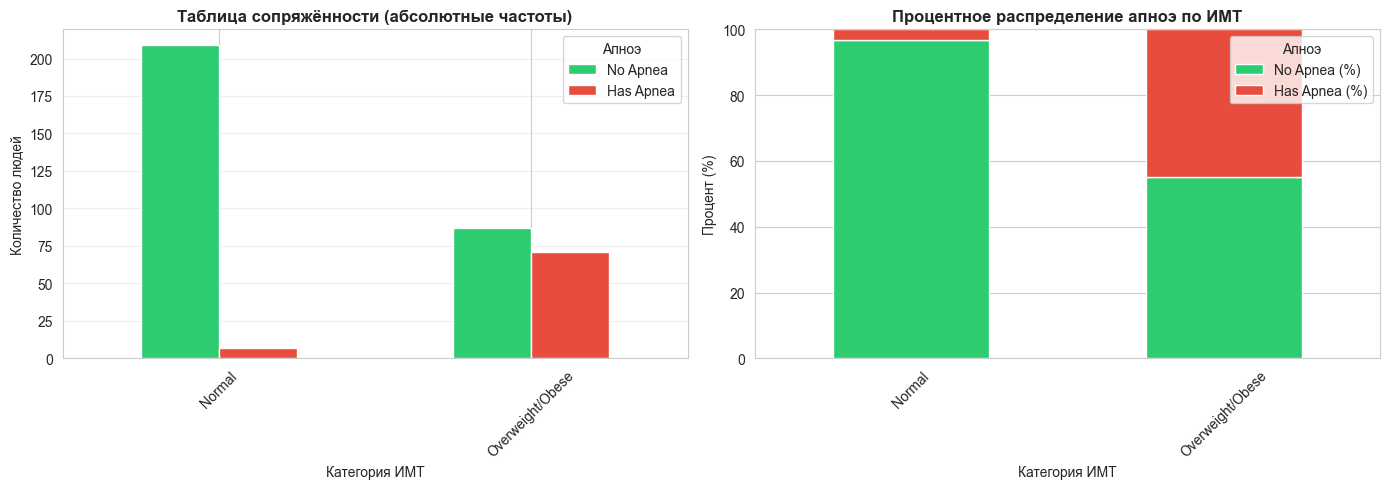

In [2]:
print('\n' + '='*80)
print('МЕТОД 1: Критерий хи-квадрат (χ²) для независимости категорий')

# Создаём таблицу сопряжённости
contingency_table = pd.crosstab(df_clean['BMI_Group'], df_clean['Has_Apnea'])
contingency_table.columns = ['No Apnea', 'Has Apnea']

print('Таблица сопряжённости (наблюдаемые частоты):')
print(contingency_table)

# Вычисляем процентные доли
contingency_pct = pd.crosstab(df_clean['BMI_Group'], df_clean['Has_Apnea'], normalize='index') * 100
contingency_pct.columns = ['No Apnea (%)', 'Has Apnea (%)']
print('\nПроцентное распределение апноэ по группам ИМТ:')
print(contingency_pct.round(2))

# Применяем критерий χ²
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print('\n' + '-'*80)
print('РЕЗУЛЬТАТЫ ТЕСТА χ²:')
print('-'*80)
print(f'Статистика χ²: {chi2:.4f}')
print(f'P-value: {p_value:.6f}')
print(f'Степени свободы: {dof}')

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print(f'\nРезультат ЗНАЧИМЫЙ (p < {alpha})')
    print('Вывод: Существует статистически значимая связь между ИМТ и апноэ во сне.')
    print('Гипотеза ПОДДЕРЖИВАЕТСЯ: люди с избыточным весом/ожирением чаще страдают апноэ.')
    significance_1 = 'Значимая'
else:
    print(f'\nРезультат НЕ значимый (p ≥ {alpha})')
    print('Вывод: Связь между ИМТ и апноэ статистически несущественна.')
    print('Гипотеза НЕ ПОДДЕРЖИВАЕТСЯ.')
    significance_1 = 'Не значимая'

print('\nОжидаемые частоты:')
print(expected_freq)

# Визуализация таблицы сопряжённости
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Абсолютные частоты
contingency_table.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Таблица сопряжённости (абсолютные частоты)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Категория ИМТ')
ax1.set_ylabel('Количество людей')
ax1.legend(title='Апноэ')
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# График 2: Процентные доли (stacked bar chart)
contingency_pct.plot(kind='bar', stacked=True, ax=ax2, color=['#2ecc71', '#e74c3c'])
ax2.set_title('Процентное распределение апноэ по ИМТ', fontsize=12, fontweight='bold')
ax2.set_xlabel('Категория ИМТ')
ax2.set_ylabel('Процент (%)')
ax2.legend(title='Апноэ', loc='upper right')
ax2.set_ylim([0, 100])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print('\n' + '='*80)

Метод 2: t-тест Стьюдента для сравнения артериального давления

Краткое описание:
t-тест Стьюдента — это параметрический статистический тест для сравнения средних значений двух независимых групп. Тест вычисляет t-статистику на основе разницы между средними значениями, дисперсии и размеров выборок. Мы используем его для сравнения артериального давления (Systolic и Diastolic) между группами людей с апноэ и без апноэ.

Почему используем:
1. Артериальное давление — числовая переменная (непрерывная)
2. Нам нужно сравнить давление в двух независимых группах: с апноэ и без апноэ
3. t-тест специально разработан для такого сравнения и проверяет, значимо ли отличаются средние значения
4. Согласно гипотезе, люди с апноэ должны иметь более высокое давление

Значимость:

Тест проверяет нулевую гипотезу (H₀): средние значения артериального давления в обеих группах равны (нет различия).
* Если p-value < 0.05, мы отклоняем H₀ и заключаем, что давление значимо отличается между группами, что подтверждает связь апноэ с повышенным давлением.
* Если среднее давление выше в группе с апноэ, это дополнительно подтверждает нашу гипотезу о положительной корреляции между апноэ и высоким давлением.


МЕТОД 2: t-тест Стьюдента для сравнения артериального давления

Размер группы БЕЗ апноэ: 296 человек
Размер группы С апноэ: 78 человек

--------------------------------------------------------------------------------
АНАЛИЗ СИСТОЛИЧЕСКОГО ДАВЛЕНИЯ (Systolic_BP)
--------------------------------------------------------------------------------

БЕЗ апноэ: Среднее = 126.12 ± 6.37 мм рт. ст.
С апноэ:   Среднее = 137.77 ± 5.14 мм рт. ст.
Разница: 11.64 мм рт. ст.

t-статистика: 14.9015
P-value (двусторонний тест): 0.000000
Различие ЗНАЧИМО (p < 0.05)
Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ ВЫСОКОЕ систолическое давление.

--------------------------------------------------------------------------------
АНАЛИЗ ДИАСТОЛИЧЕСКОГО ДАВЛЕНИЯ (Diastolic_BP)

БЕЗ апноэ: Среднее = 82.52 ± 4.58 мм рт. ст.
С апноэ:   Среднее = 92.72 ± 4.49 мм рт. ст.
Разница: 10.19 мм рт. ст.

t-статистика: 17.5533
P-value (двусторонний тест): 0.000000
Различие ЗНАЧИМО (p < 0.05)
   Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ ВЫСОКОЕ диас

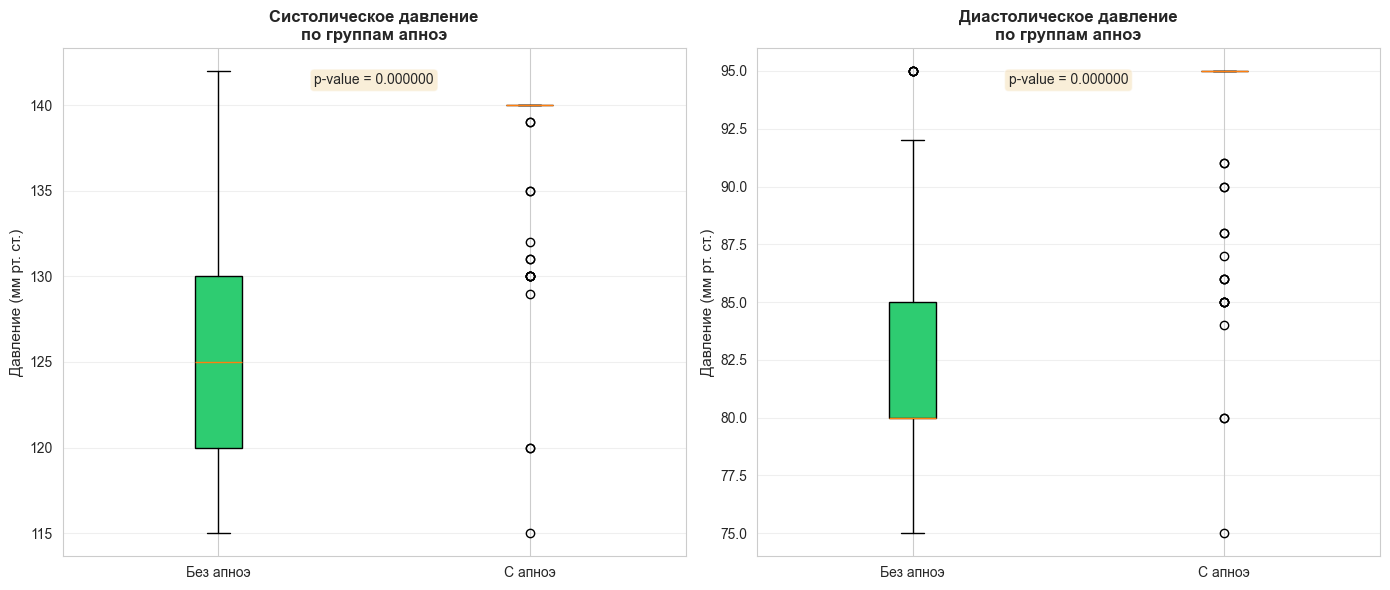

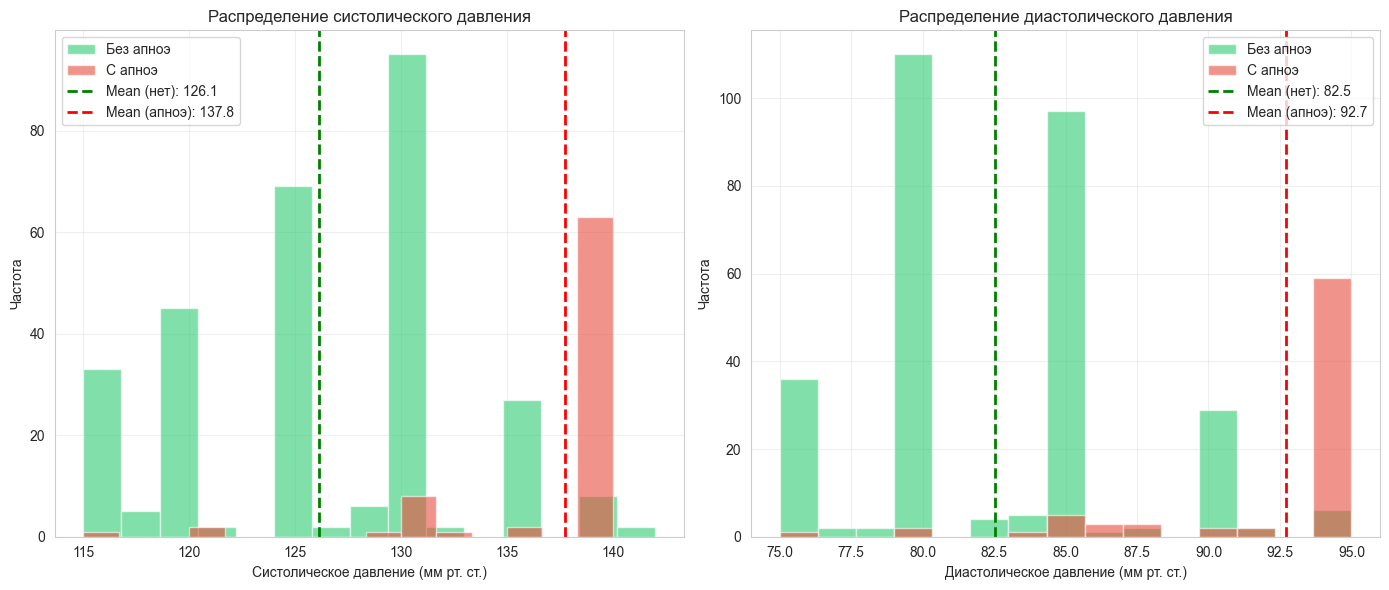

In [3]:
print('\n' + '='*80)
print('МЕТОД 2: t-тест Стьюдента для сравнения артериального давления')
print('='*80 + '\n')

# Разделяем данные на две группы
group_no_apnea = df_clean[df_clean['Has_Apnea'] == 0]
group_with_apnea = df_clean[df_clean['Has_Apnea'] == 1]

print(f'Размер группы БЕЗ апноэ: {len(group_no_apnea)} человек')
print(f'Размер группы С апноэ: {len(group_with_apnea)} человек')

print('\n' + '-'*80)
print('АНАЛИЗ СИСТОЛИЧЕСКОГО ДАВЛЕНИЯ (Systolic_BP)')
print('-'*80)

systolic_no_apnea = group_no_apnea['Systolic_BP'].dropna()
systolic_with_apnea = group_with_apnea['Systolic_BP'].dropna()

mean_systolic_no = systolic_no_apnea.mean()
std_systolic_no = systolic_no_apnea.std()
mean_systolic_with = systolic_with_apnea.mean()
std_systolic_with = systolic_with_apnea.std()

print(f'\nБЕЗ апноэ: Среднее = {mean_systolic_no:.2f} ± {std_systolic_no:.2f} мм рт. ст.')
print(f'С апноэ:   Среднее = {mean_systolic_with:.2f} ± {std_systolic_with:.2f} мм рт. ст.')
print(f'Разница: {mean_systolic_with - mean_systolic_no:.2f} мм рт. ст.')

# t-тест для систолического давления
t_stat_systolic, p_value_systolic = ttest_ind(systolic_with_apnea, systolic_no_apnea)

print(f'\nt-статистика: {t_stat_systolic:.4f}')
print(f'P-value (двусторонний тест): {p_value_systolic:.6f}')

alpha = 0.05
if p_value_systolic < alpha:
    print(f'Различие ЗНАЧИМО (p < {alpha})')
    if mean_systolic_with > mean_systolic_no:
        print('Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ ВЫСОКОЕ систолическое давление.')
        significance_sys = 'Значимо выше'
    else:
        print('Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ НИЗКОЕ систолическое давление.')
        significance_sys = 'Значимо ниже'
else:
    print(f'Различие НЕ значимо (p ≥ {alpha})')
    print('Разницы в систолическом давлении нет.')
    significance_sys = 'Не значимо'

print('\n' + '-'*80)
print('АНАЛИЗ ДИАСТОЛИЧЕСКОГО ДАВЛЕНИЯ (Diastolic_BP)')

diastolic_no_apnea = group_no_apnea['Diastolic_BP'].dropna()
diastolic_with_apnea = group_with_apnea['Diastolic_BP'].dropna()

mean_diastolic_no = diastolic_no_apnea.mean()
std_diastolic_no = diastolic_no_apnea.std()
mean_diastolic_with = diastolic_with_apnea.mean()
std_diastolic_with = diastolic_with_apnea.std()

print(f'\nБЕЗ апноэ: Среднее = {mean_diastolic_no:.2f} ± {std_diastolic_no:.2f} мм рт. ст.')
print(f'С апноэ:   Среднее = {mean_diastolic_with:.2f} ± {std_diastolic_with:.2f} мм рт. ст.')
print(f'Разница: {mean_diastolic_with - mean_diastolic_no:.2f} мм рт. ст.')

# t-тест для диастолического давления
t_stat_diastolic, p_value_diastolic = ttest_ind(diastolic_with_apnea, diastolic_no_apnea)

print(f'\nt-статистика: {t_stat_diastolic:.4f}')
print(f'P-value (двусторонний тест): {p_value_diastolic:.6f}')

if p_value_diastolic < alpha:
    print(f'Различие ЗНАЧИМО (p < {alpha})')
    if mean_diastolic_with > mean_diastolic_no:
        print('   Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ ВЫСОКОЕ диастолическое давление.')
        significance_dias = 'Значимо выше'
    else:
        print('   Люди с апноэ имеют ЗНАЧИМО БОЛЕЕ НИЗКОЕ диастолическое давление.')
        significance_dias = 'Значимо ниже'
else:
    print(f'✗ Различие НЕ значимо (p ≥ {alpha})')
    print('   Разницы в диастолическом давлении нет.')
    significance_dias = 'Не значимо'

print('\n' + '='*80)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Систолическое давление
data_systolic = [systolic_no_apnea, systolic_with_apnea]
labels_systolic = ['Без апноэ', 'С апноэ']
bp1 = axes[0].boxplot(data_systolic, labels=labels_systolic, patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#2ecc71', '#e74c3c']):
    patch.set_facecolor(color)
axes[0].set_ylabel('Давление (мм рт. ст.)', fontsize=11)
axes[0].set_title('Систолическое давление\nпо группам апноэ', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].text(0.5, 0.95, f'p-value = {p_value_systolic:.6f}', 
            transform=axes[0].transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# График 2: Диастолическое давление
data_diastolic = [diastolic_no_apnea, diastolic_with_apnea]
labels_diastolic = ['Без апноэ', 'С апноэ']
bp2 = axes[1].boxplot(data_diastolic, labels=labels_diastolic, patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#2ecc71', '#e74c3c']):
    patch.set_facecolor(color)
axes[1].set_ylabel('Давление (мм рт. ст.)', fontsize=11)
axes[1].set_title('Диастолическое давление\nпо группам апноэ', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].text(0.5, 0.95, f'p-value = {p_value_diastolic:.6f}', 
            transform=axes[1].transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Дополнительный график: распределение давлений
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма для систолического
axes[0].hist(systolic_no_apnea, bins=15, alpha=0.6, label='Без апноэ', color='#2ecc71')
axes[0].hist(systolic_with_apnea, bins=15, alpha=0.6, label='С апноэ', color='#e74c3c')
axes[0].axvline(mean_systolic_no, color='green', linestyle='--', linewidth=2, label=f'Mean (нет): {mean_systolic_no:.1f}')
axes[0].axvline(mean_systolic_with, color='red', linestyle='--', linewidth=2, label=f'Mean (апноэ): {mean_systolic_with:.1f}')
axes[0].set_xlabel('Систолическое давление (мм рт. ст.)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение систолического давления')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Гистограмма для диастолического
axes[1].hist(diastolic_no_apnea, bins=15, alpha=0.6, label='Без апноэ', color='#2ecc71')
axes[1].hist(diastolic_with_apnea, bins=15, alpha=0.6, label='С апноэ', color='#e74c3c')
axes[1].axvline(mean_diastolic_no, color='green', linestyle='--', linewidth=2, label=f'Mean (нет): {mean_diastolic_no:.1f}')
axes[1].axvline(mean_diastolic_with, color='red', linestyle='--', linewidth=2, label=f'Mean (апноэ): {mean_diastolic_with:.1f}')
axes[1].set_xlabel('Диастолическое давление (мм рт. ст.)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение диастолического давления')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()